<a href="https://colab.research.google.com/github/Isaacguto02/Inteligencia-Artificial-Ago-Dic/blob/main/Convolution_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Load Fashion MNIST dataset
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

4422102/4422102 [==============================] - 1s 0us/step


In [ ]:
# Build the CNN model
model = keras.Sequential([
    keras.layers.Reshape((28, 28, 1), input_shape=(28, 28)),
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])


In [18]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=10,validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 [==============================] - 62s 32ms/step - loss: 0.0346 - accuracy: 0.9889 - val_loss: 0.8755 - val_accuracy: 0.9037
Epoch 2/10
1875/1875 [==============================] - 59s 31ms/step - loss: 0.0304 - accuracy: 0.9904 - val_loss: 0.8140 - val_accuracy: 0.9090
Epoch 3/10
1875/1875 [==============================] - 62s 33ms/step - loss: 0.0337 - accuracy: 0.9887 - val_loss: 0.8842 - val_accuracy: 0.9022
Epoch 4/10
1875/1875 [==============================] - 59s 31ms/step - loss: 0.0320 - accuracy: 0.9898 - val_loss: 0.8775 - val_accuracy: 0.9058
Epoch 5/10
1875/1875 [==============================] - 61s 33ms/step - loss: 0.0334 - accuracy: 0.9892 - val_loss: 0.8684 - val_accuracy: 0.9079
Epoch 6/10
1875/1875 [==============================] - 59s 31ms/step - loss: 0.0293 - accuracy: 0.9904 - val_loss: 0.9486 - val_accuracy: 0.9069
Epoch 7/10
1875/1875 [==============================] - 58s 31ms/step - loss: 0.0297 - accuracy: 0.9902 - val_loss: 0.8888 -

313/313 - 3s - loss: 0.9129 - accuracy: 0.9080 - 3s/epoch - 9ms/step

Test accuracy: 0.9079999923706055


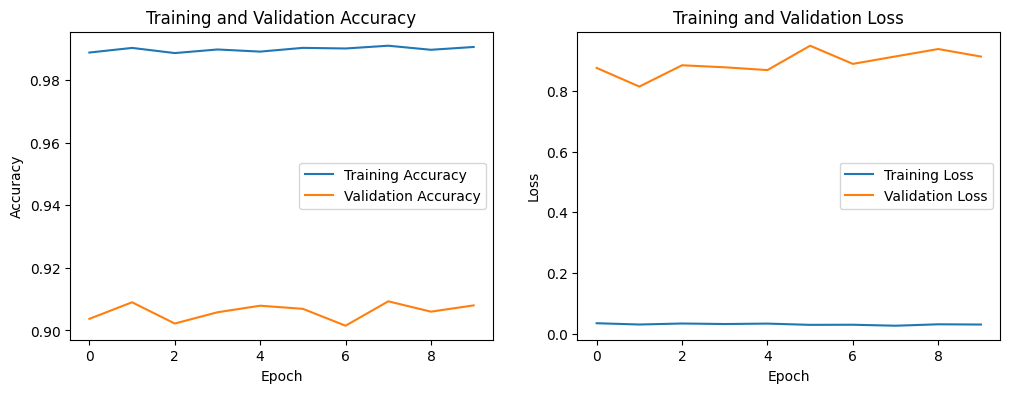

In [19]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

# Plot training history
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

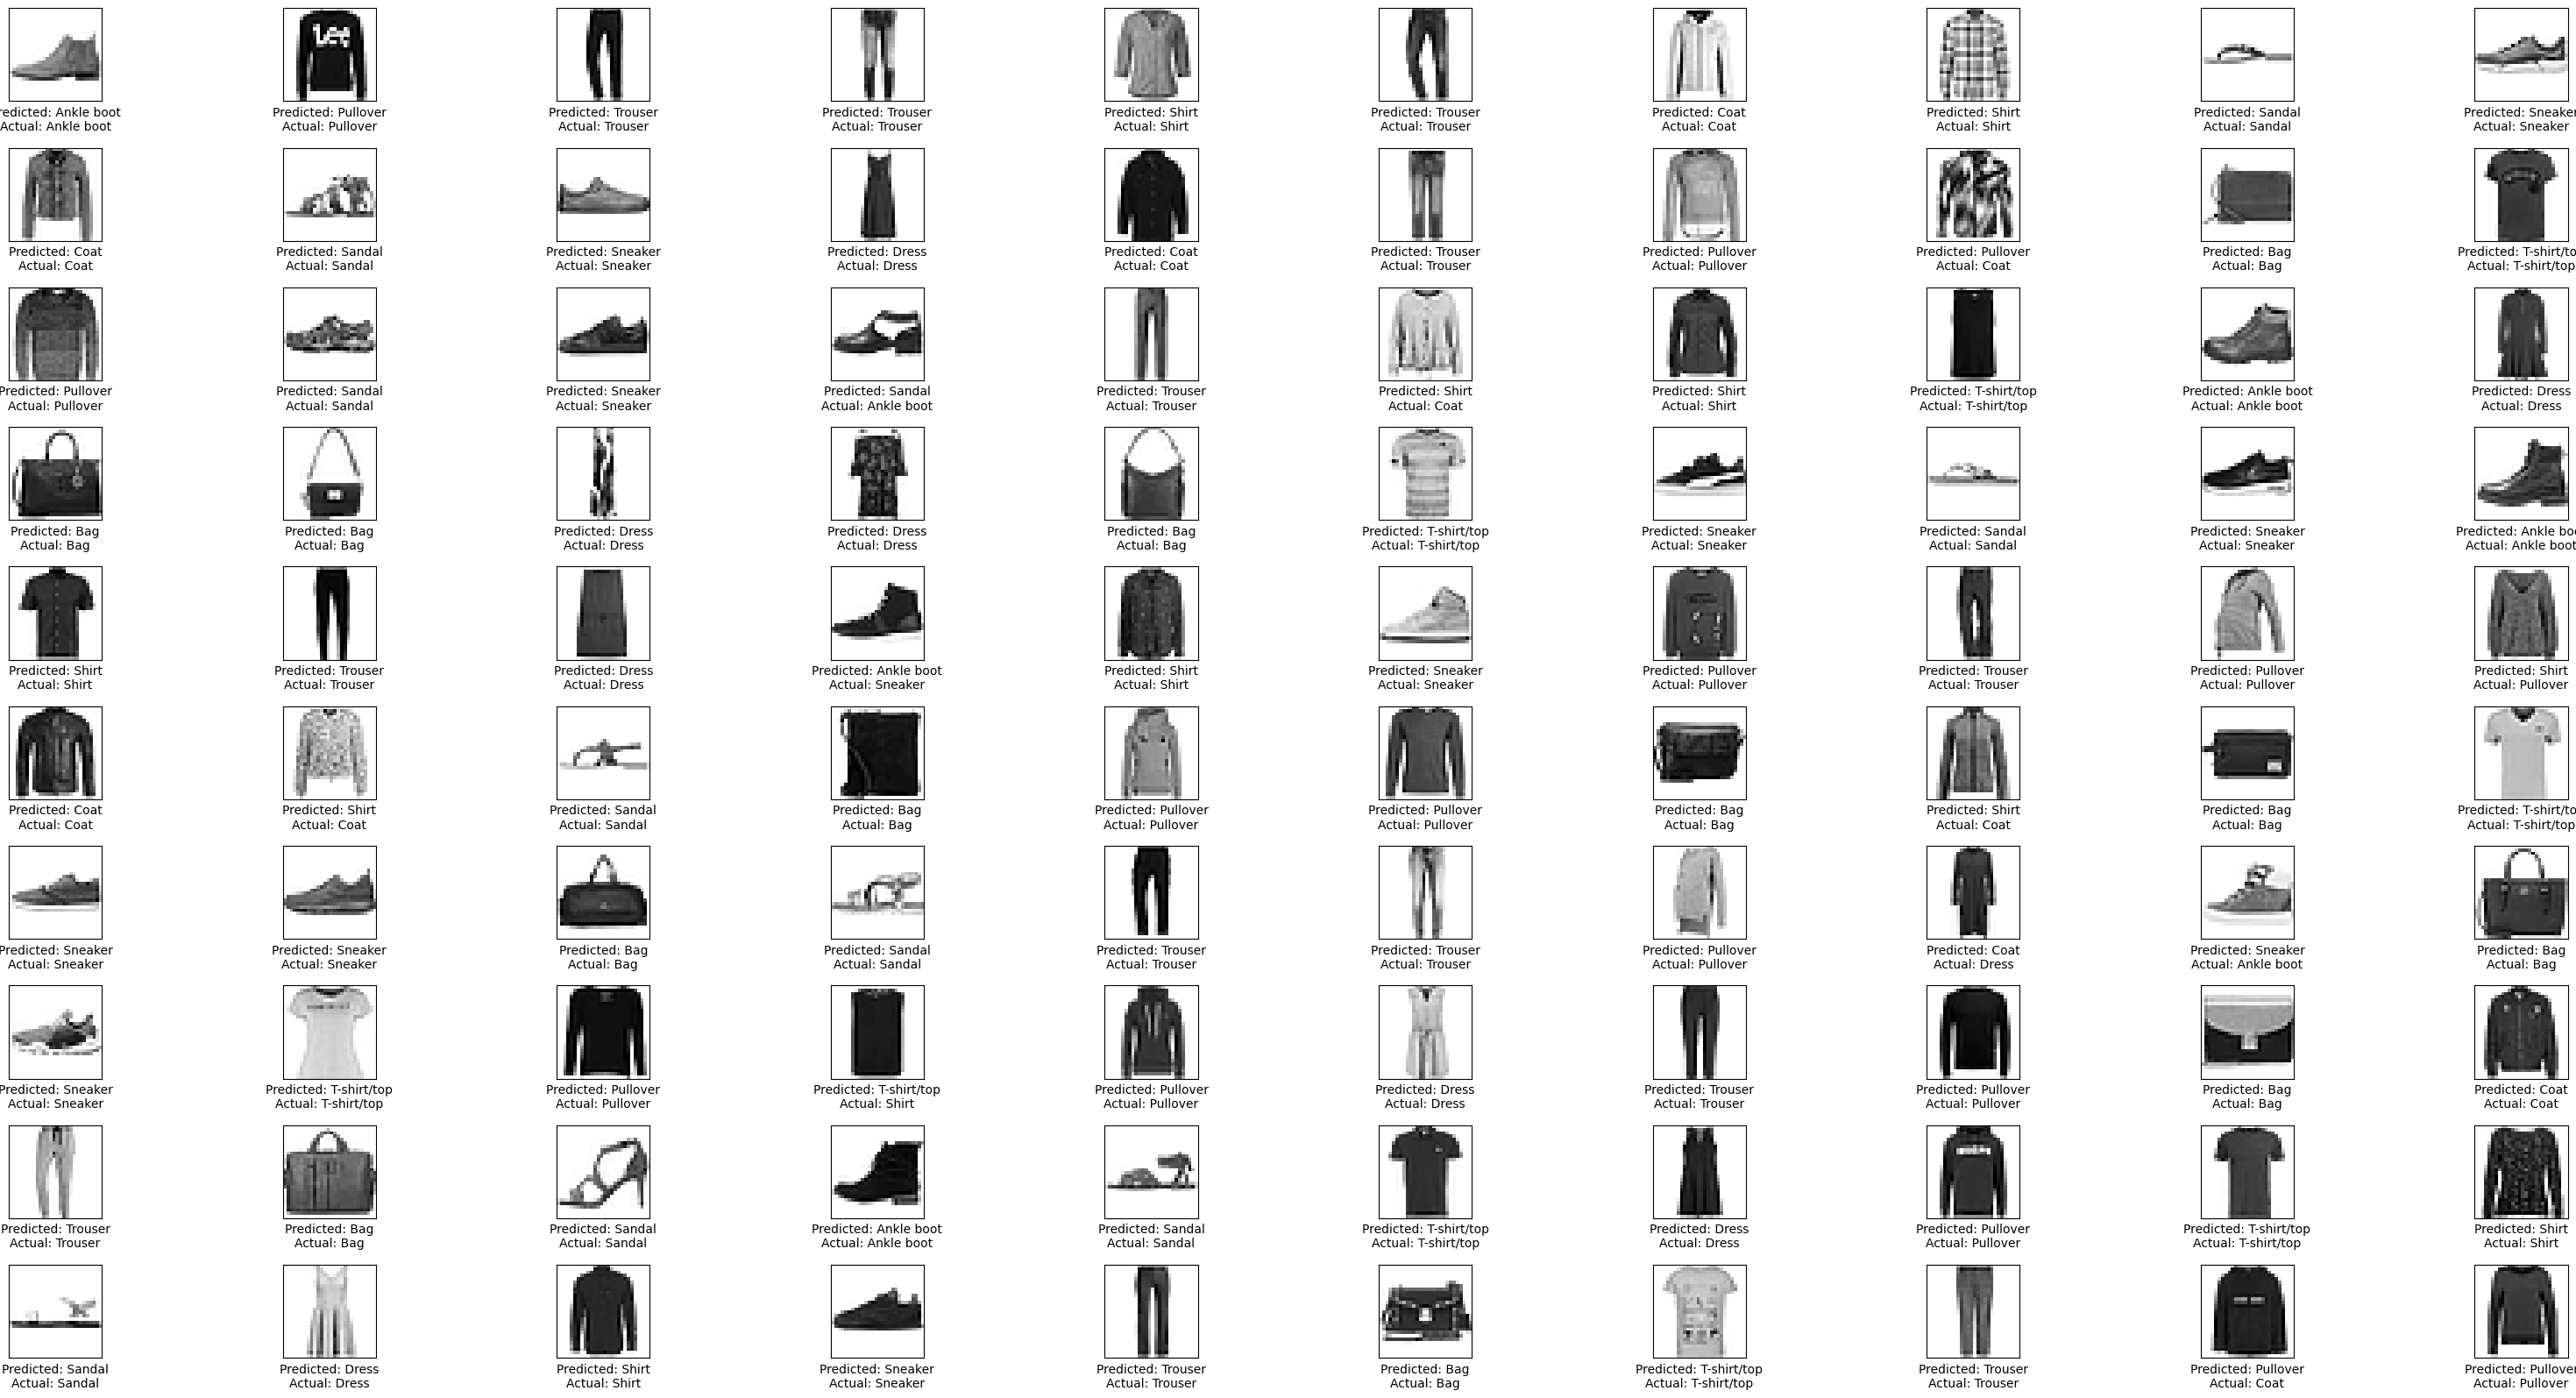

In [ ]:
# Visualización de algunas predicciones
num_rows = 10
num_cols = 10
num_images = num_rows * num_cols
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
plt.subplots_adjust(hspace=0.5)  # Ajuste del espacio vertical entre filas
for i in range(num_images):
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.xlabel("Predicted: {}\nActual: {}".format(class_names[np.argmax(predictions[i])], class_names[test_labels[i]]))
plt.show()